# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 14-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari
-----------------------------------

# <font color='blue'>PART 3: FEATURE REDUCTION USING LASSO</font>

In [34]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [35]:
pd.options.display.float_format = '{:.2f}'.format

In [36]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean2.csv', low_memory=False)

In [37]:
master_df.head()

,mobile_number,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,night_0.0.1,night_1.0.1,night_0.0.2,night_1.0.2,fb_0.0,fb_1.0,fb_0.0.1,fb_1.0.1,fb_0.0.2,fb_1.0.2
0,7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,...,0,0,0,0,0,0,0,0,0,0
1,7002311591,288.56,376.66,111.61,186.59,1326.06,771.14,52.96,0.00,7.28,...,0,0,0,0,0,0,0,0,0,0
2,7000959346,120.19,236.14,1.71,2082.18,2532.03,408.54,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,7000104470,1241.99,1026.66,0.00,112.91,115.13,0.00,0.00,0.00,0.38,...,0,0,0,0,0,0,0,0,0,0
4,7000409785,424.98,328.73,363.98,457.09,361.34,391.68,315.29,303.04,254.34,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#list(master_df)

In [39]:
master_df.shape

(28504, 156)

In [40]:
telecom = master_df.drop(['mobile_number'], 1)
telecom = telecom.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)
telecom = telecom.drop(['fb_churn_6', 'fb_churn_7', 'fb_churn_8', 'night_pck_churn_6', 'night_pck_churn_7', 'night_pck_churn_8'], 1)


In [41]:
telecom.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,night_0.0.1,night_1.0.1,night_0.0.2,night_1.0.2,fb_0.0,fb_1.0,fb_0.0.1,fb_1.0.1,fb_0.0.2,fb_1.0.2
0,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,0,0,0,0,0,0,0,0,0,0
1,288.56,376.66,111.61,186.59,1326.06,771.14,52.96,0.00,7.28,10.69,...,0,0,0,0,0,0,0,0,0,0
2,120.19,236.14,1.71,2082.18,2532.03,408.54,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,1241.99,1026.66,0.00,112.91,115.13,0.00,0.00,0.00,0.38,0.00,...,0,0,0,0,0,0,0,0,0,0
4,424.98,328.73,363.98,457.09,361.34,391.68,315.29,303.04,254.34,613.84,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#list(telecom)

## Create X, y variables

In [43]:
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']

In [44]:
X.shape

(28504, 142)

## Applying standard scale

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

X = scaler.transform(X)

## Lasso

In [46]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X,y)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X)
pos = model.get_support(indices=True)
 
print(X_lasso.shape)
print(pos)

(28504, 84)
[  0   5   6   7   9  10  11  12  15  19  20  21  22  23  31  34  35  36
  37  38  42  43  44  45  46  47  49  50  54  55  56  57  61  62  63  64
  65  67  74  75  76  77  78  79  80  81  82  84  85  86  87  88  89  90
  91  92  94  95  98 101 102 103 104 106 107 108 109 110 111 112 117 118
 120 123 124 126 127 128 129 131 134 135 138 141]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


# applying smote to balance the data set

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_lasso,y)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(53816, 84)
(53816,)


26908

## Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr, train_size=0.7,random_state=42)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
print(X_train.shape)
print (y_train.shape)
print(X_test.shape)

(37671, 84)
(37671,)
(16145, 84)


In [50]:
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))
      

Feature space holds 28504 observations and 142 features
Unique target labels: [0 1]


# applying random forest with default hyperparameter

In [51]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [52]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
# Making predictions
predictions = rfc.predict(X_test)

In [54]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      8042
          1       0.97      0.96      0.96      8103

avg / total       0.96      0.96      0.96     16145



In [55]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7760  282]
 [ 295 7808]]


In [56]:
print(accuracy_score(y_test,predictions))

0.9642613812325798


# hyperparameter tuning

# Tuning max_depth

In [57]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [58]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.56,0.02,0.83,0.83,2,{'max_depth': 2},4,0.83,0.82,0.82,...,0.84,0.83,0.81,0.82,0.84,0.84,0.01,0.00,0.01,0.01
1,1.60,0.02,0.91,0.92,7,{'max_depth': 7},3,0.92,0.92,0.90,...,0.90,0.92,0.91,0.92,0.91,0.92,0.09,0.00,0.00,0.00
2,2.33,0.03,0.95,0.98,12,{'max_depth': 12},2,0.95,0.98,0.95,...,0.95,0.98,0.94,0.98,0.95,0.98,0.03,0.01,0.00,0.00
3,2.77,0.03,0.96,0.99,17,{'max_depth': 17},1,0.96,0.99,0.96,...,0.96,0.99,0.96,0.99,0.96,0.99,0.06,0.01,0.00,0.00


<Figure size 576x396 with 0 Axes>

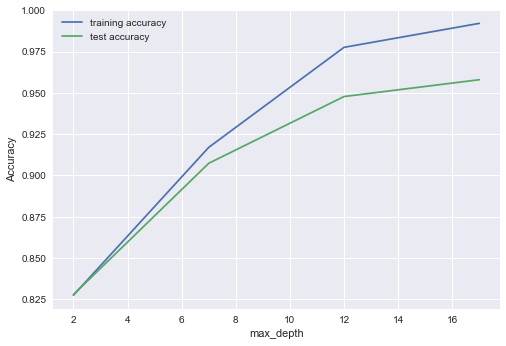

In [59]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning n_estimators

In [60]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [61]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,9.57,0.14,0.87,0.87,100,{'n_estimators': 100},4,0.88,0.88,0.87,...,0.87,0.87,0.87,0.88,0.87,0.87,0.18,0.02,0.00,0.00
1,47.67,0.61,0.87,0.88,500,{'n_estimators': 500},3,0.88,0.88,0.87,...,0.88,0.88,0.87,0.88,0.87,0.88,0.31,0.01,0.00,0.00
2,86.05,1.08,0.88,0.88,900,{'n_estimators': 900},2,0.88,0.87,0.88,...,0.88,0.88,0.87,0.88,0.87,0.88,0.49,0.01,0.00,0.00
3,124.30,1.62,0.88,0.88,1300,{'n_estimators': 1300},1,0.88,0.87,0.88,...,0.88,0.88,0.87,0.88,0.87,0.88,0.44,0.06,0.00,0.00


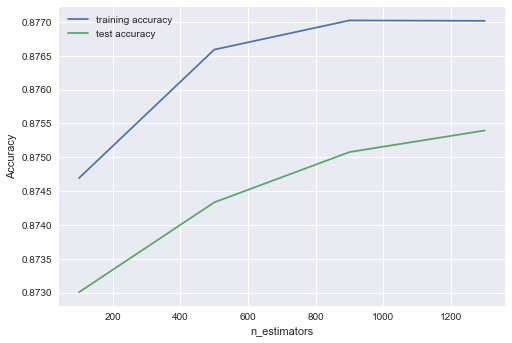

In [62]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Tuning max_features

In [63]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,28,32,36,40,44,48,52,56]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [64]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.50,0.02,0.85,0.86,4,{'max_features': 4},13,0.85,0.84,0.86,...,0.86,0.86,0.83,0.84,0.86,0.87,0.04,0.01,0.01,0.01
1,0.89,0.02,0.86,0.86,8,{'max_features': 8},12,0.87,0.86,0.85,...,0.87,0.87,0.86,0.86,0.85,0.85,0.02,0.00,0.01,0.01
2,1.46,0.02,0.87,0.87,14,{'max_features': 14},11,0.87,0.87,0.87,...,0.87,0.88,0.87,0.88,0.87,0.87,0.04,0.00,0.00,0.00
3,2.01,0.02,0.87,0.88,20,{'max_features': 20},9,0.88,0.87,0.87,...,0.88,0.88,0.86,0.87,0.87,0.88,0.02,0.00,0.00,0.00
4,2.47,0.02,0.87,0.87,24,{'max_features': 24},10,0.88,0.88,0.88,...,0.87,0.87,0.87,0.87,0.87,0.87,0.09,0.01,0.00,0.00


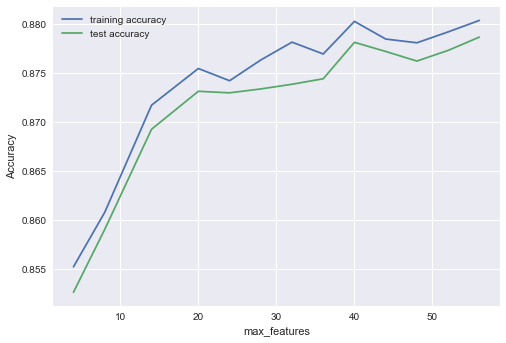

In [65]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning min_samples_leaf

In [66]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [67]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.88,0.02,0.90,0.91,100,{'min_samples_leaf': 100},1,0.90,0.90,0.90,...,0.89,0.90,0.90,0.91,0.90,0.91,0.10,0.01,0.00,0.00
1,1.76,0.03,0.89,0.90,150,{'min_samples_leaf': 150},2,0.90,0.89,0.89,...,0.89,0.90,0.89,0.90,0.89,0.90,0.11,0.01,0.00,0.00
2,1.60,0.02,0.89,0.90,200,{'min_samples_leaf': 200},3,0.89,0.89,0.90,...,0.89,0.89,0.88,0.89,0.89,0.90,0.01,0.01,0.00,0.00
3,1.49,0.02,0.89,0.89,250,{'min_samples_leaf': 250},4,0.89,0.89,0.89,...,0.89,0.89,0.88,0.88,0.88,0.88,0.03,0.01,0.01,0.00
4,1.43,0.02,0.88,0.88,300,{'min_samples_leaf': 300},6,0.89,0.88,0.88,...,0.88,0.88,0.87,0.88,0.86,0.87,0.04,0.00,0.01,0.00


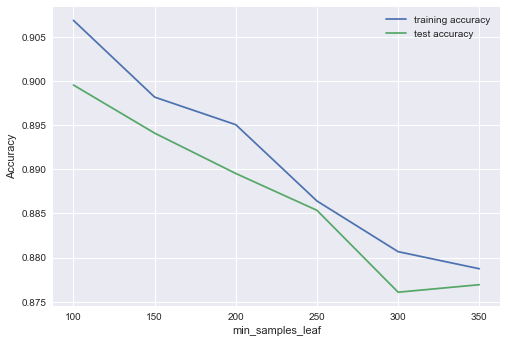

In [68]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning min_samples_split

In [69]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [70]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.65,0.03,0.92,0.93,200,{'min_samples_split': 200},1,0.92,0.93,0.92,...,0.91,0.93,0.92,0.93,0.91,0.93,0.06,0.01,0.00,0.00
1,2.60,0.03,0.91,0.92,250,{'min_samples_split': 250},2,0.92,0.92,0.91,...,0.91,0.92,0.90,0.92,0.90,0.92,0.09,0.01,0.01,0.00
2,2.50,0.03,0.91,0.92,300,{'min_samples_split': 300},4,0.91,0.91,0.90,...,0.91,0.92,0.90,0.91,0.90,0.91,0.07,0.01,0.00,0.00
3,2.46,0.03,0.91,0.91,350,{'min_samples_split': 350},3,0.91,0.91,0.90,...,0.90,0.91,0.90,0.91,0.91,0.92,0.04,0.01,0.00,0.00
4,2.39,0.03,0.90,0.91,400,{'min_samples_split': 400},5,0.91,0.91,0.90,...,0.90,0.91,0.90,0.91,0.89,0.91,0.09,0.01,0.00,0.00


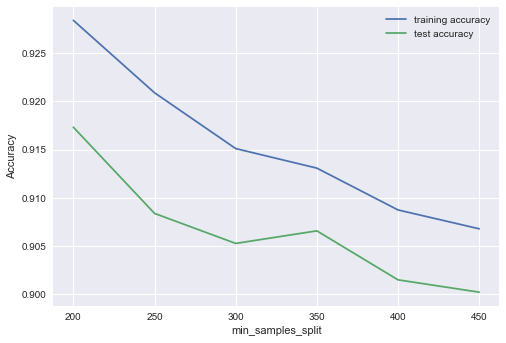

In [71]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Grid Search to Find Optimal Hyperparameters

In [73]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10,20,30,40,50]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))